## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
## Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view? usp=share_link
## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

# Separate the features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Define the numerical and categorical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = [f for f in X.columns if f not in numerical_features]

# Create a pipeline for label encoding
label_encoder_pipeline = Pipeline([
    ('label_encoder', OrdinalEncoder()),
])

# Apply label encoding to categorical features
X[categorical_features] = label_encoder_pipeline.fit_transform(X[categorical_features])

# Print the preprocessed dataset
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1.0,3.0,145,233,1.0,0.0,150,0.0,2.3,0.0,0.0,1.0
1,37,1.0,2.0,130,250,0.0,1.0,187,0.0,3.5,0.0,0.0,2.0
2,41,0.0,1.0,130,204,0.0,0.0,172,0.0,1.4,2.0,0.0,2.0
3,56,1.0,1.0,120,236,0.0,1.0,178,0.0,0.8,2.0,0.0,2.0
4,57,0.0,0.0,120,354,0.0,1.0,163,1.0,0.6,2.0,0.0,2.0


## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,
                                                   random_state=42)

In [8]:
X_train.shape, X_test.shape

((211, 13), (91, 13))

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already preprocessed and split your dataset into X_train and y_train

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the random forest classifier on the training set
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,recall_score, f1_score

y_pred = rf_classifier.predict(X_test)

print("Accuracy :", accuracy_score(y_test,y_pred))
print(100*"=")
print("Recall :", recall_score(y_test, y_pred))
print(100*"=")
print("Precission :", precision_score(y_test, y_pred))
print(100*"=")
print("f1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.8241758241758241
Recall : 0.8367346938775511
Precission : 0.8367346938775511
f1 Score : 0.8367346938775511


## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

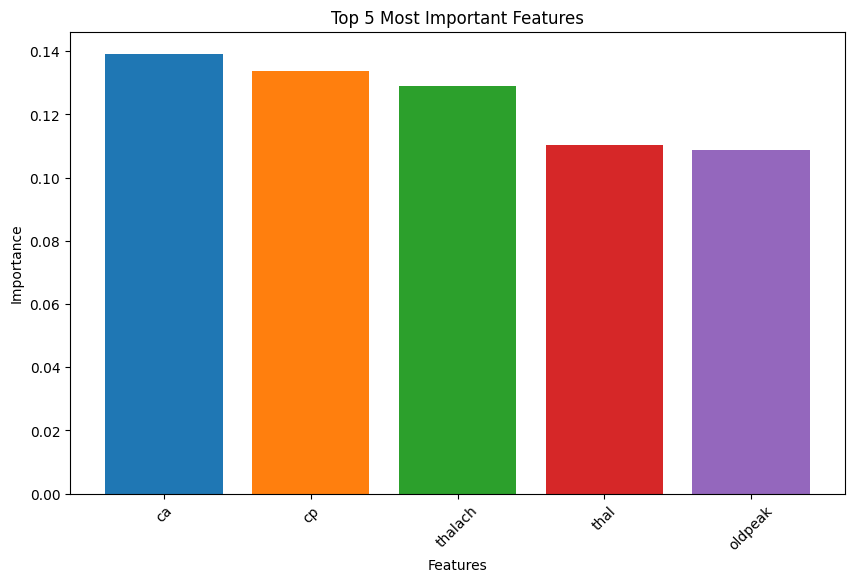

In [11]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Get feature importances from the trained random forest classifier
importances = rf_classifier.feature_importances_

# Get the indices of the top 5 most important features
top_indices = importances.argsort()[-5:][::-1]

# Get the corresponding feature names
top_features = X.columns[top_indices]

# Generate a color map with different colors for each bar
colors = plt.cm.get_cmap('tab10')(np.arange(len(top_indices)))

# Visualize the feature importances using a bar chart with different colors
plt.figure(figsize=(10, 6))
plt.bar(top_features, importances[top_indices], color=colors)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 5 Most Important Features")
plt.xticks(rotation=45)
plt.show()


## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with different hyperparameter values to try
param_grid = {
    "criterion" : ["gini", "entropy", "log_loss"],
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Create a grid search object with the random forest classifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_

# Train the random forest classifier with the best hyperparameters on the entire training set
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the performance on the test set
accuracy = best_rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)
print(best_params)

Accuracy: 0.8351648351648352
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [13]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [14]:
from sklearn.metrics import classification_report

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_

# Train the random forest classifier with the best hyperparameters on the entire training set
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

y_pred_tuned = best_rf_classifier.predict(X_test)

# Print classification reports for both models
print("Default Model:")
print(classification_report(y_test, y_pred))

print("Tuned Model:")
print(classification_report(y_test, y_pred_tuned))


Default Model:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Tuned Model:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.83      0.80      0.81        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

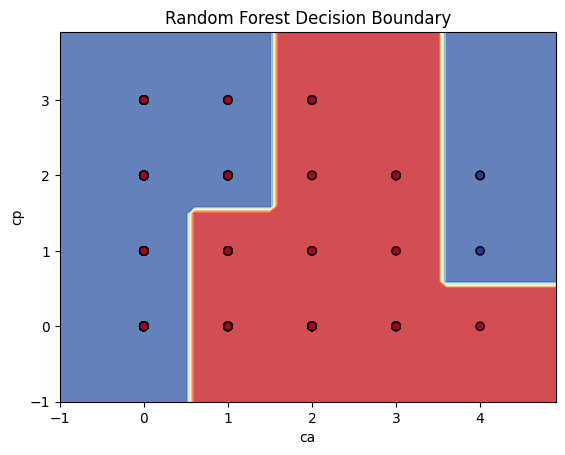

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(X, columns=['ca', 'cp'])
df['target'] = y

# Separate features and target variable
X = df[['ca', 'cp']]
y = df['target']
# Define the range of values for the features
x1_min, x1_max = X['ca'].min() - 1, X['ca'].max() + 1
x2_min, x2_max = X['cp'].min() - 1, X['cp'].max() + 1

# Create a grid of points using the feature ranges
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

rf = RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=3, min_samples_leaf=2, min_samples_split=5 )
rf.fit(X, y)

# Get predictions for the grid points using the Random Forest model
predictions = rf.predict(grid_points)

# Reshape the predictions to match the shape of the grid
predictions = predictions.reshape(xx1.shape)

# Plot the decision boundary
plt.contourf(xx1, xx2, predictions, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X['ca'], X['cp'], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.xlabel('ca')
plt.ylabel('cp')
plt.title('Random Forest Decision Boundary')
plt.show()

Insights:

Feature Importance: Random Forest models provide feature importances, which indicate the relative importance of each feature in predicting heart disease risk. By analyzing the feature importances, you can identify the most influential factors for the prediction. For example, features such as age, cholesterol levels, blood pressure, and smoking status might have a higher impact on predicting heart disease risk.

Non-linearity: Random Forest models can capture non-linear relationships between features and the target variable. This is beneficial for heart disease prediction since risk factors can often have complex interactions. The model can capture non-linear patterns and dependencies that may not be apparent with linear models.

Robustness: Random Forest models are robust to outliers and noise in the data. Outliers or noisy data points are less likely to have a significant impact on the overall prediction, which can be advantageous when dealing with real-world medical datasets that may contain errors or inconsistencies.

Ensemble of Decision Trees: Random Forest models are an ensemble of decision trees, combining multiple individual models to make predictions. This ensemble approach helps to reduce overfitting and improve generalization performance.

Limitations: